Mean Squared Error (Short EMA): 47.778007798747474
Mean Squared Error (Long EMA): 268.67553503993224
Root Mean Squared Error (Short EMA): 6.912163756650118
Root Mean Squared Error (Long EMA): 16.391324993420522
Mean Absolute Error (Short EMA): 5.717949241960927
Mean Absolute Error (Long EMA): 13.693158390415924
R-squared (Short EMA): 0.9714360286241286
R-squared (Long EMA): 0.8393729532507057
MAPE (Short EMA): 2.01%
MAPE (Long EMA): 4.71%
Accuracy of Buy Signals: 0.3652694610778443
Accuracy of Sell Signals: 0.3652694610778443


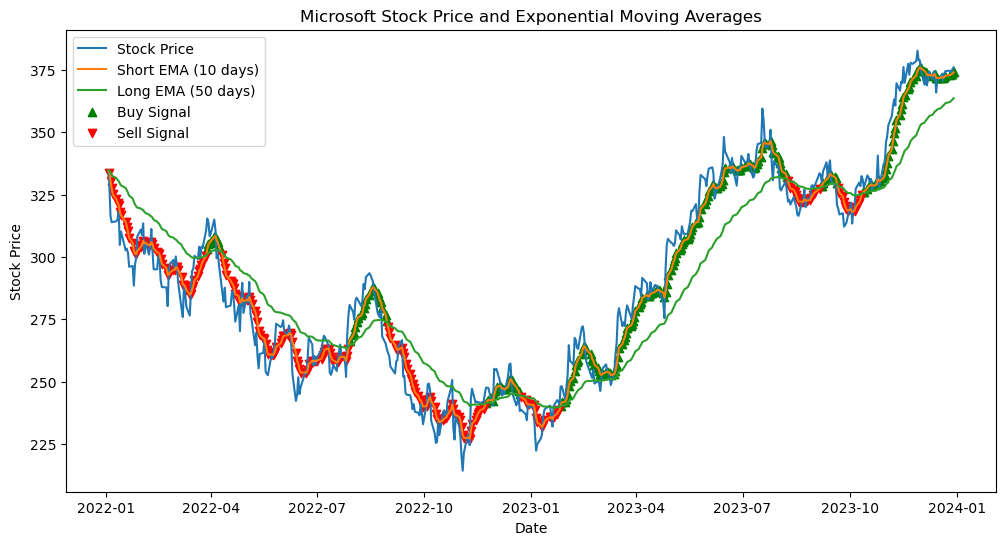

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

# Read data from CSV file
file_path = r'C:\Users\DELL\Downloads\microsoftdata.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate 10-day and 50-day EMAs
short_window = 10
long_window = 50
df['Short_EMA'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df['Long_EMA'] = df['Close'].ewm(span=long_window, adjust=False).mean()

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse_short_ema = mean_squared_error(df['Close'], df['Short_EMA'])
rmse_short_ema = np.sqrt(mse_short_ema)

mse_long_ema = mean_squared_error(df['Close'], df['Long_EMA'])
rmse_long_ema = np.sqrt(mse_long_ema)

print(f"Mean Squared Error (Short EMA): {mse_short_ema}")
print(f"Mean Squared Error (Long EMA): {mse_long_ema}")
print(f"Root Mean Squared Error (Short EMA): {rmse_short_ema}")
print(f"Root Mean Squared Error (Long EMA): {rmse_long_ema}")

# Calculate Mean Absolute Error (MAE)
mae_short_ema = np.mean(np.abs(df['Close'] - df['Short_EMA']))
mae_long_ema = np.mean(np.abs(df['Close'] - df['Long_EMA']))

print(f"Mean Absolute Error (Short EMA): {mae_short_ema}")
print(f"Mean Absolute Error (Long EMA): {mae_long_ema}")

# Calculate R-squared (R^2)
mean_actual_price = np.mean(df['Close'])
ss_total = np.sum((df['Close'] - mean_actual_price) ** 2)
ss_res = np.sum((df['Close'] - df['Short_EMA']) ** 2)
r_squared_short_ema = 1 - (ss_res / ss_total)

ss_res = np.sum((df['Close'] - df['Long_EMA']) ** 2)
r_squared_long_ema = 1 - (ss_res / ss_total)

print(f"R-squared (Short EMA): {r_squared_short_ema}")
print(f"R-squared (Long EMA): {r_squared_long_ema}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape_short_ema = np.mean(np.abs((df['Close'] - df['Short_EMA']) / df['Close'])) * 100
mape_long_ema = np.mean(np.abs((df['Close'] - df['Long_EMA']) / df['Close'])) * 100

print(f"MAPE (Short EMA): {mape_short_ema:.2f}%")
print(f"MAPE (Long EMA): {mape_long_ema:.2f}%")

# Calculate accuracy of buy/sell signals
buy_signals_actual = df['Close'] < df['Short_EMA']
buy_signals_predicted = df['Short_EMA'] > df['Long_EMA']
accuracy_buy_signals = accuracy_score(buy_signals_actual, buy_signals_predicted)

sell_signals_actual = df['Close'] > df['Short_EMA']
sell_signals_predicted = df['Short_EMA'] < df['Long_EMA']
accuracy_sell_signals = accuracy_score(sell_signals_actual, sell_signals_predicted)

print(f"Accuracy of Buy Signals: {accuracy_buy_signals}")
print(f"Accuracy of Sell Signals: {accuracy_sell_signals}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Stock Price')
plt.plot(df.index, df['Short_EMA'], label=f'Short EMA ({short_window} days)')
plt.plot(df.index, df['Long_EMA'], label=f'Long EMA ({long_window} days)')

# Plotting crossovers
buy_signals = df[df['Short_EMA'] > df['Long_EMA']]
sell_signals = df[df['Short_EMA'] < df['Long_EMA']]

plt.scatter(buy_signals.index, buy_signals['Short_EMA'], marker='^', color='g', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Short_EMA'], marker='v', color='r', label='Sell Signal')

plt.title('Microsoft Stock Price and Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


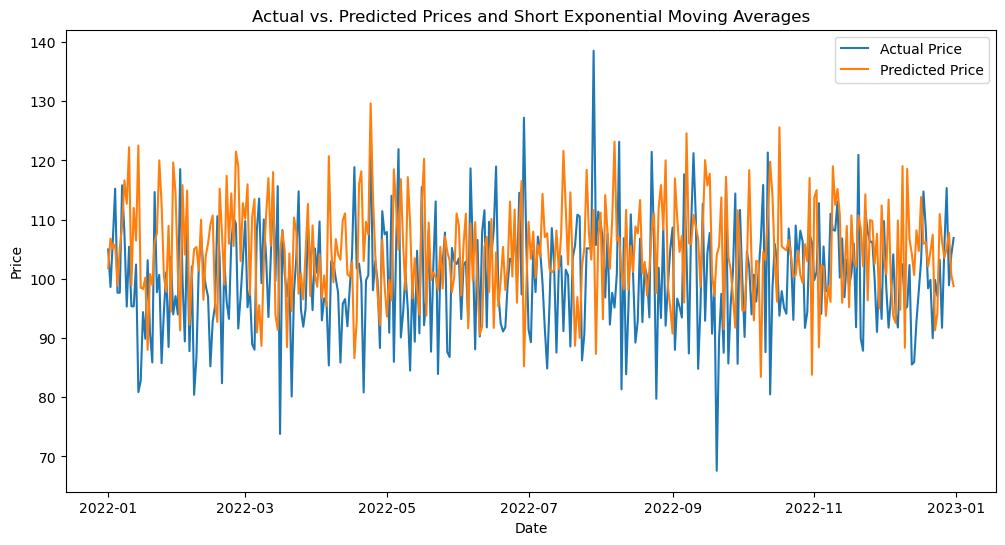

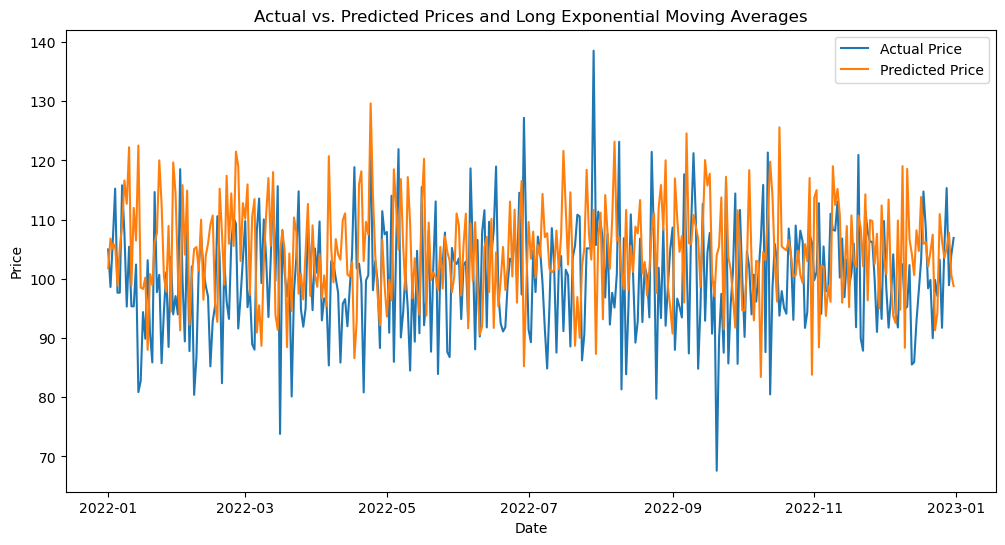

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
actual_prices = np.random.normal(loc=100, scale=10, size=len(dates))
predicted_prices = np.random.normal(loc=105, scale=8, size=len(dates))

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Actual_Price': actual_prices, 'Predicted_Price': predicted_prices})
df.set_index('Date', inplace=True)

# Calculate Exponential Moving Averages
short_window = 10
long_window = 50
df['Short_EMA_Actual'] = df['Actual_Price'].ewm(span=short_window, adjust=False).mean()
df['Long_EMA_Actual'] = df['Actual_Price'].ewm(span=long_window, adjust=False).mean()

df['Short_EMA_Predicted'] = df['Predicted_Price'].ewm(span=short_window, adjust=False).mean()
df['Long_EMA_Predicted'] = df['Predicted_Price'].ewm(span=long_window, adjust=False).mean()

# Plotting Short EMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Actual_Price'], label='Actual Price')
plt.plot(df.index, df['Predicted_Price'], label='Predicted Price')
#plt.plot(df.index, df['Short_EMA_Actual'], label=f'Short EMA Actual ({short_window} days)')
#plt.plot(df.index, df['Short_EMA_Predicted'], label=f'Short EMA Predicted ({short_window} days)')

plt.title('Actual vs. Predicted Prices and Short Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting Long EMA
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Actual_Price'], label='Actual Price')
plt.plot(df.index, df['Predicted_Price'], label='Predicted Price')
#plt.plot(df.index, df['Long_EMA_Actual'], label=f'Long EMA Actual ({long_window} days)')
#plt.plot(df.index, df['Long_EMA_Predicted'], label=f'Long EMA Predicted ({long_window} days)')

plt.title('Actual vs. Predicted Prices and Long Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


C:\Users\DELL\Documents\Custom Office Templates\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Performance Metrics for EMA signals:
Accuracy: 0.25
Precision: 0.75
Recall: 0.25
F1-score: 0.25


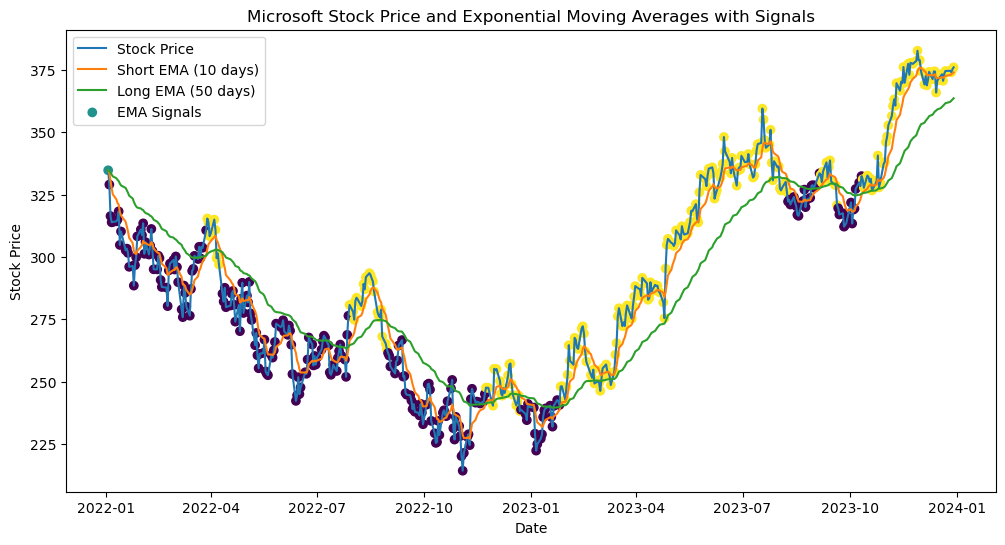

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to generate EMA signals
def generate_ema_signals(data, short_window, long_window):
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = 0  # 0: No signal, 1: Buy signal, -1: Sell signal
    
    # Calculate EMAs
    data['Short_EMA'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['Long_EMA'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    
    # Generate buy/sell signals
    signals['Signal'] = np.where(data['Short_EMA'] > data['Long_EMA'], 1, 0)
    signals['Signal'] = np.where(data['Short_EMA'] < data['Long_EMA'], -1, signals['Signal'])
    
    return signals

# Function to evaluate EMA signals
def evaluate_signals(actual_moves, predicted_moves):
    accuracy = accuracy_score(actual_moves, predicted_moves)
    precision = precision_score(actual_moves, predicted_moves, average='weighted')
    recall = recall_score(actual_moves, predicted_moves, average='weighted')
    f1 = f1_score(actual_moves, predicted_moves, average='weighted')
    
    return accuracy, precision, recall, f1

# Read data from CSV file
file_path = r'C:\Users\DELL\Downloads\microsoftdata.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Parameters for EMA calculation
short_window = 10
long_window = 50

# Generate EMA signals
ema_signals = generate_ema_signals(df, short_window, long_window)

# Evaluate EMA signals
actual_moves = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)  # 1: Price will go up, 0: Price will go down
accuracy, precision, recall, f1 = evaluate_signals(actual_moves, ema_signals['Signal'])

print("Performance Metrics for EMA signals:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Visualize EMA signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Stock Price')
plt.plot(df.index, df['Short_EMA'], label=f'Short EMA ({short_window} days)')
plt.plot(df.index, df['Long_EMA'], label=f'Long EMA ({long_window} days)')
plt.scatter(ema_signals.index, df.loc[ema_signals.index]['Close'], c=ema_signals['Signal'], cmap='viridis', label='EMA Signals')
plt.title('Microsoft Stock Price and Exponential Moving Averages with Signals')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
